# Classic MDS (CMDSCALE) - Precomputed

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
A = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SOURCE",index_col=0)
display(A)

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Toyota Corolla,1166,55,399,157,815,140
Lada 1300,1294,68,404,161,955,140
Alfasud TI,1350,79,393,161,870,165
Lancia Beta,1297,82,429,169,1080,160
Mazda 9295,1769,83,440,165,1095,165
Fiat 132,1585,98,439,164,1105,165
Alfetta 1.66,1570,109,428,162,1060,175
Princess 1800,1798,82,445,172,1160,158
Audi 100,1588,85,468,177,1110,160


In [3]:
from scipy.spatial.distance import pdist,squareform
dist = squareform(pdist(A,metric="euclidean"))
B = pd.DataFrame(dist,index=A.index,columns=A.index)

In [4]:
from scientisttools import CMDSCALE
my_cmds =CMDSCALE(n_components=2,proximity="precomputed",normalized_stress=True,parallelize=False)
my_cmds.fit(B)

CMDSCALE(n_components=2, proximity='precomputed')

## Eigenvalues

In [5]:
# Valeurs propres
from scientisttools import get_eig
eig = get_eig(my_cmds)
display(eig.round(2))

,eigenvalue,difference,proportion,cumulative
Dim.1,1110687.72,1031471.26,93.07,93.07
Dim.2,79216.46,77393.45,6.64,99.70


## Individuals coordinates

In [6]:
my_cmds.result_["coord"]

,Dim.1,Dim.2
Toyota Corolla,-514.368216,-65.795531
Lada 1300,-342.766700,14.875213
Alfasud TI,-322.669602,-85.483117
Lancia Beta,-290.429211,131.454491
Mazda 9295,151.927781,-33.798481
Fiat 132,-13.716817,46.156247
Alfetta 1.66,-44.526156,9.763934
Princess 1800,203.304446,15.419721
Audi 100,-7.649174,52.420252
Taunus 2000,353.774482,-132.490668


## Transform

In [7]:
DSupp = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SUPP",index_col=0)
my_cmds.transform(DSupp)

,Dim.1,Dim.2
Modele,,
Citroen GS Club,-418.260083,19.707020
Renault 30,1065.891142,-165.824064
Peugeot 504,201.478597,16.499780


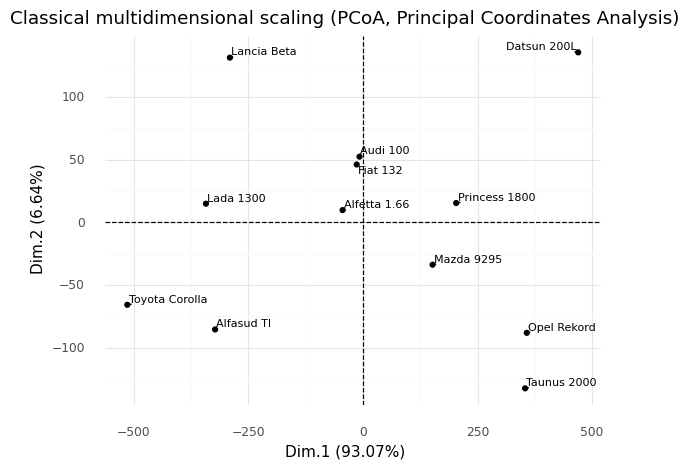

In [9]:
from scientisttools import fviz_cmdscale
p = fviz_cmdscale(my_cmds,repel=True)
print(p)